In [1]:
# Importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [6]:
# Setting display options 
pd.set_option("display.max_columns",None)

# 1. Data Collection

In [7]:
df = pd.read_csv(r"C:\Users\znbra\Downloads\allhyper.data", sep = ",", header = None)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative.|2924
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative.|974
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative.|1493
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative.|252


# 2. Data Preparation 

In [9]:
df.rename(columns = {0:"age",1:"sex",2:"on_thyroxine",3:"query_on_thyroxine",4:"on_antithyroid_medication",5:"sick",
                       6:"pregnant",7:"thyroid_surgery",8:"I131_treatment",9:"query_hypothyroid",10:"query_hyperthyroid",
                       11:"lithium",12:"goitre",13:"tumor",14:"hypopituitary",15:"psych",16:"TSH_measured",17:"TSH",
                       18:"T3_measured",19:"T3",20:"TT4_measured",21:"TT4",22:"T4U_measured",23:"T4U",24:"FTI_measured",
                       25:"FTI",26:"TBG_measured",27:"TBG",28:"referral_sources",29:"classes"},inplace = True)

In [10]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_sources,classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative.|2924
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative.|974
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative.|1493
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative.|252


## 2.1 Data Exploration

In [11]:
# Shape of dataset
df.shape

(3772, 30)

In [12]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

# 3. Data Wrangling

In [13]:
df.classes = df.classes.str.split(".").str[0]

In [14]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_sources,classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative


In [15]:
# Replacing "?" with NaN
df.replace("?",np.NaN,inplace = True)

## 3.1 Missing values

In [16]:
df.isnull().sum()/df.shape[0]

age                          0.000265
sex                          0.039767
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
on_antithyroid_medication    0.000000
sick                         0.000000
pregnant                     0.000000
thyroid_surgery              0.000000
I131_treatment               0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
lithium                      0.000000
goitre                       0.000000
tumor                        0.000000
hypopituitary                0.000000
psych                        0.000000
TSH_measured                 0.000000
TSH                          0.097826
T3_measured                  0.000000
T3                           0.203871
TT4_measured                 0.000000
TT4                          0.061241
T4U_measured                 0.000000
T4U                          0.102598
FTI_measured                 0.000000
FTI                          0.102068
TBG_measured

### 3.1.1 Dropping columns with null value percentage greater than 40%

In [17]:
df = df.loc[:,df.isnull().sum()/df.shape[0] < 0.4]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [19]:
# Converting datatypes of columns
num_cols = ["TSH","T3","TT4","T4U","FTI","age"]

for col in num_cols:
    
    df[col] = pd.to_numeric(df[col], errors = "coerce")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

## 3.3 Handling missing values

In [21]:
df.age.describe(percentiles = [0.8,0.9,0.95,0.99,0.995,0.999])

count    3771.000000
mean       51.735879
std        20.084958
min         1.000000
50%        54.000000
80%        70.000000
90%        75.000000
95%        79.000000
99%        87.000000
99.5%      89.000000
99.9%      93.000000
max       455.000000
Name: age, dtype: float64

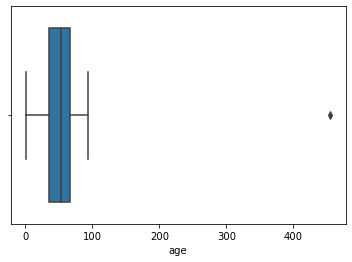

In [22]:
sns.boxplot(df.age)
plt.show()

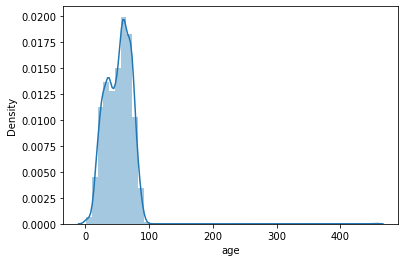

In [23]:
sns.distplot(df.age)
plt.show()

In [24]:
df.age[df.age > 100]

1364    455.0
Name: age, dtype: float64

In [25]:
df.age[df.age > 90] = 90

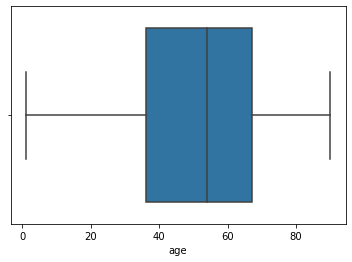

In [26]:
sns.boxplot(df.age)
plt.show()

In [27]:
df.age.fillna(df.age.median(),inplace = True)

In [28]:
df.sex.value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [29]:
df.sex.fillna(df.sex.mode()[0], inplace = True)

In [30]:
cols = ["TSH", "T3","TT4","FTI","T4U","FTI"]

for col in cols:
    df[col].fillna(0.0, inplace = True)

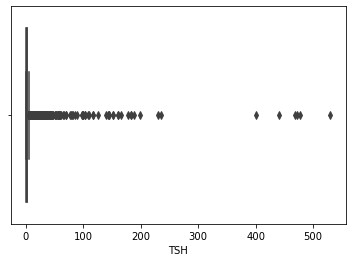

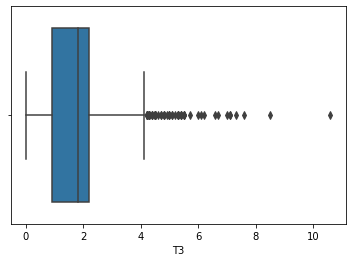

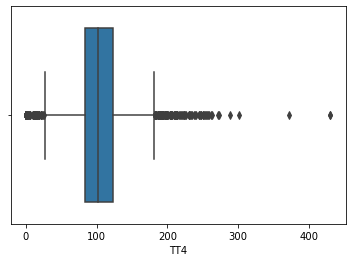

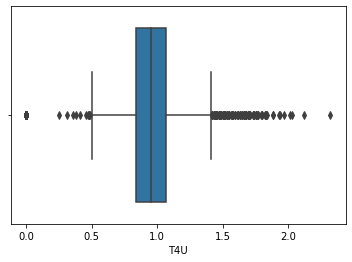

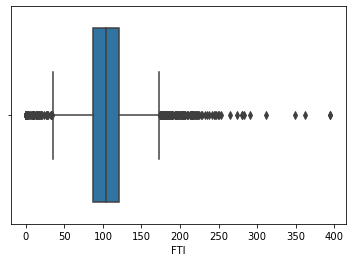

In [31]:
num_cols = ["TSH","T3","TT4","T4U","FTI"]

for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

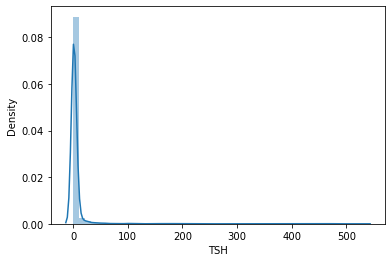

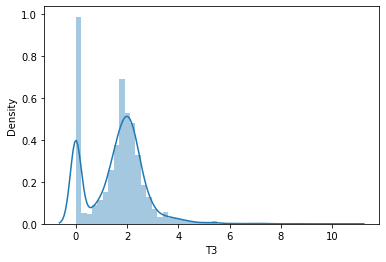

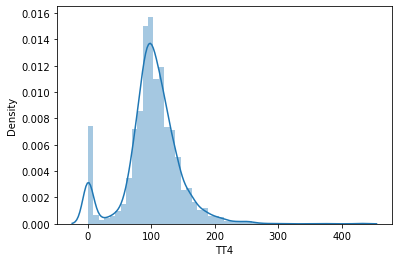

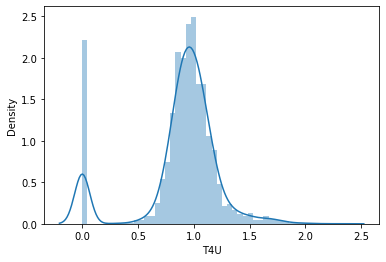

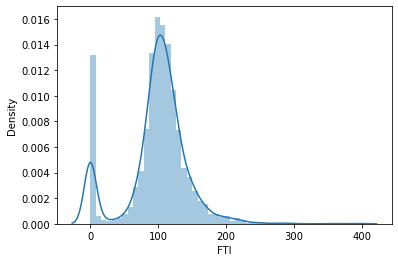

In [32]:
num_cols = ["TSH","T3","TT4","T4U","FTI"]

for col in num_cols:
    sns.distplot(df[col])
    plt.show()

In [33]:
# Mapping female to 0 and male to 1
df.sex = df.sex.map({"F":0,"M":1})

In [34]:
cols = df.columns

In [35]:
cols = cols.drop(["age","sex","TSH","T3","TT4","T4U","FTI","classes","referral_sources"])

In [36]:
cols

Index(['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
       'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured'],
      dtype='object')

In [37]:
# Mapping false to 0 and true to 1
for col in cols:
    df[col] = df[col].map({"f" : 0, "t" : 1})

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   int64  
 2   on_thyroxine               3772 non-null   int64  
 3   query_on_thyroxine         3772 non-null   int64  
 4   on_antithyroid_medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid_surgery            3772 non-null   int64  
 8   I131_treatment             3772 non-null   int64  
 9   query_hypothyroid          3772 non-null   int64  
 10  query_hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

## Dropping insignificant columns

In [39]:
df.drop(["TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"],axis =1, inplace = True)

## 3.4 Data Visualization

In [40]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_sources,classes
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0,other,negative
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0,other,negative
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0,other,negative
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.00,0.0,0.0,0.00,0.0,other,negative
3768,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,2.1,124.0,1.08,114.0,SVI,negative
3769,74.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.10,1.8,112.0,1.07,105.0,other,negative
3770,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,2.0,82.0,0.94,87.0,SVI,negative


In [41]:
cols = df.columns
cols = cols.drop(["age","TSH","T3","TT4","FTI","T4U"])

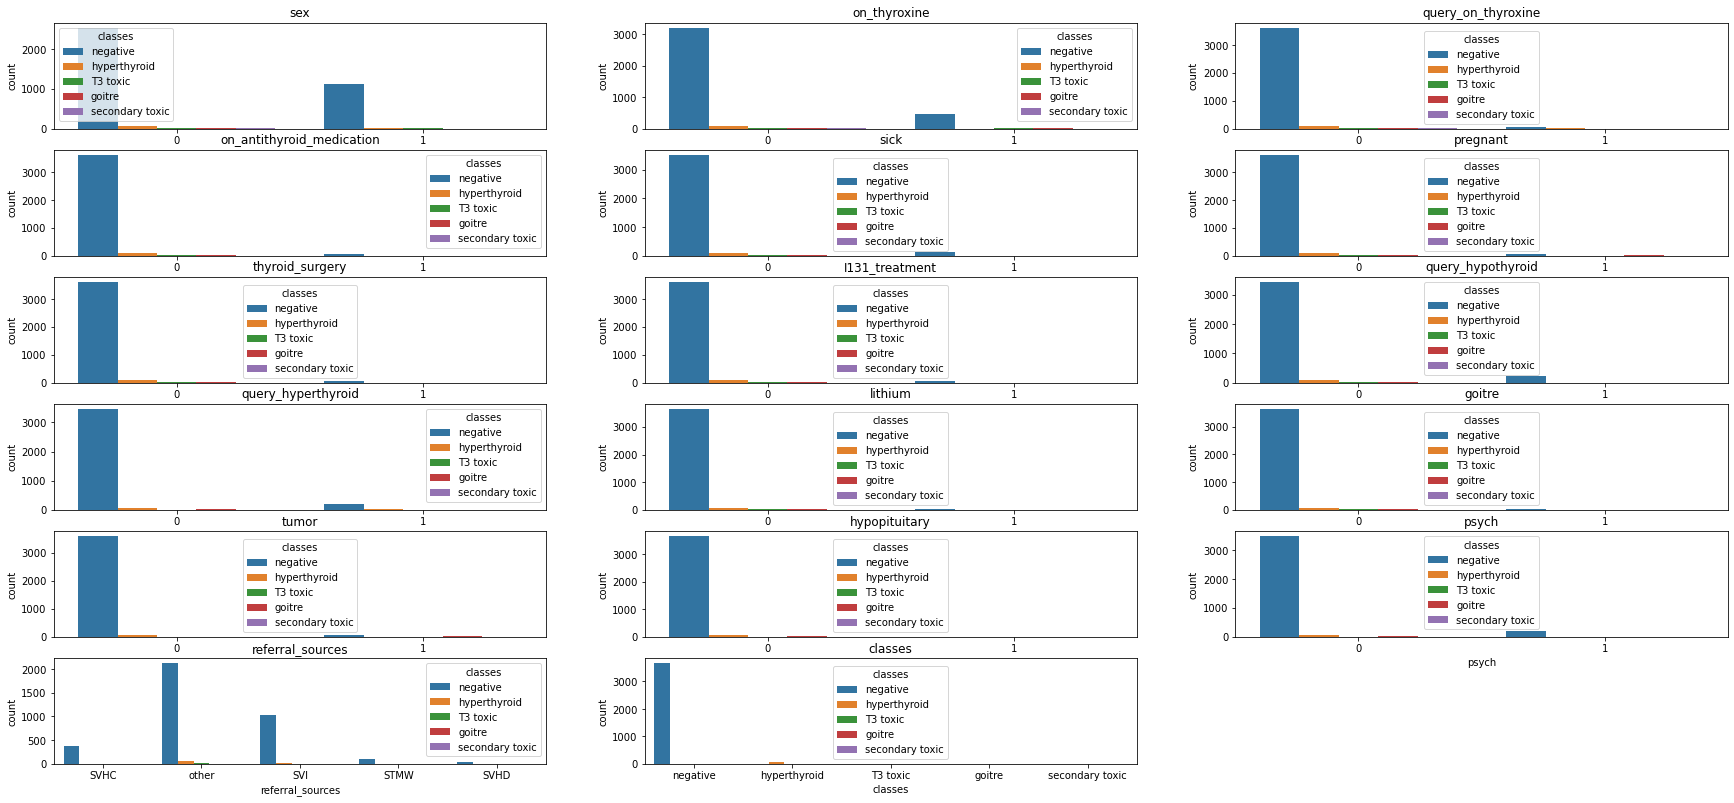

In [42]:
plt.figure(figsize = (30,30))
for i,col in enumerate(cols):
    plt.subplot(13,3,i+1)
    sns.countplot(df[col], hue = df["classes"])
    plt.title(col)
plt.show()

In [43]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_sources,classes
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0,other,negative
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0,other,negative
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0,other,negative
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,SVI,negative


# 4. Data Preprocessing

In [44]:
label_encoder = preprocessing.LabelEncoder()

df["classes"] = label_encoder.fit_transform(df["classes"])

In [45]:
df["referral_sources"] = label_encoder.fit_transform(df["referral_sources"])

In [46]:
df["classes"].unique()

array([3, 2, 0, 1, 4])

In [47]:
df["referral_sources"].unique()

array([1, 4, 3, 0, 2])

In [48]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_sources,classes
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1,3
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0,4,3
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0,4,3
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0,4,3
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,3,3


In [49]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_sources,classes
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.634411,0.302757,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,0.062831,0.004772,0.009014,0.025451,0.000265,0.048780,4.589148,1.603006,101.685790,0.892915,99.194247,3.279427,2.965005
std,18.977138,0.459512,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,0.242692,0.068924,0.094525,0.157510,0.016282,0.215437,23.339839,1.096918,43.182478,0.354204,45.846407,1.092085,0.237875
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.900000,84.000000,0.840000,86.750000,3.000000,3.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,1.800000,102.000000,0.950000,104.000000,4.000000,3.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.425000,2.200000,123.000000,1.070000,121.250000,4.000000,3.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,10.600000,430.000000,2.320000,395.000000,4.000000,4.000000


# 5. Model Building

In [50]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [51]:
y_train = df_train.pop("classes")
X_train = df_train
y_test = df_test.pop("classes")
X_test = df_test


In [52]:
y_train.shape, X_train.shape

((2640,), (2640, 22))

In [53]:
y_test.shape, X_test.shape

((1132,), (1132, 22))

## SMOTE

In [54]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [55]:
counter = Counter(y_train)
for k, v in counter.items():
    per = v/len(y_train) * 100
    print("Class = %d, n = %d,(%.3f%%)" % (k,v,per))


Class = 3, n = 2567,(25.000%)
Class = 2, n = 2567,(25.000%)
Class = 0, n = 2567,(25.000%)
Class = 1, n = 2567,(25.000%)


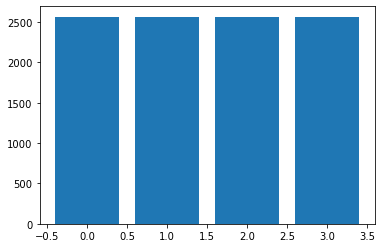

In [56]:
plt.bar(counter.keys(), counter.values())
plt.show()

## XGBoost

In [57]:
xgb_cfl = XGBClassifier(n_jobs = -1, objective = "binary:logistic")
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [58]:
params = {
    "n_estimators" : [10,50,100,200],
    "learning_rate" : [0.01,0.02,0.05,0.1,0.25],
    "max_depth" : [3,5,10,20]
}



grid_search = GridSearchCV(xgb_cfl, params, verbose = 3, cv = 5)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.988 total time=   0.5s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.985 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.992 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.991 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.985 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.988 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.990 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.994 total time=   0.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.992 total time=   0.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.992 total t

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [59]:
grid_search.best_params_

{'learning_rate': 0.25, 'max_depth': 5, 'n_estimators': 100}

In [60]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [61]:
xgb_cfl = XGBClassifier(learning_rate = 0.25, max_depth = 5, n_estimators = 100, objective = "binary:logistic")
xgb_cfl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

## SVM

In [ ]:
# svm_clf = svm.SVC(class_weight = "balanced")

# svm_params_list = {"C" : [1,2,4,8],
#                   "kernel": ["poly", "rbf"],
#                   "degree" : [3,4,5],
#                   "gamma" : ["auto", "scale"]}

# grid_search = GridSearchCV(svm_clf, svm_params_list, verbose = 3, cv = 5)

# grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=1, degree=3, gamma=auto, kernel=poly;, score=0.993 total time= 4.8min
[CV 2/5] END C=1, degree=3, gamma=auto, kernel=poly;, score=0.995 total time= 2.8min


In [ ]:
# grid_search.best_params_

In [79]:
# grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10)

In [112]:
# svm_clf = svm.SVC(C =, degree = , gamma = , kernel = )

## KNN

In [63]:
knn = KNeighborsClassifier()

knn_params = { "algorithm" : ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [10,17,24,28,30,35],
             "n_neighbors" : [4,5,8,10,11],
             "p" : [1,2]
             }

grid_search = GridSearchCV(knn, knn_params, verbose = 3, cv = 5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.979 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.974 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.977 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.980 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.977 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.978 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.975 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.978 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.980 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, lea

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 17, 24, 28, 30, 35],
                         'n_neighbors': [4, 5, 8, 10, 11], 'p': [1, 2]},
             verbose=3)

In [64]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, p=1)

In [65]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1}

In [66]:
knn = KNeighborsClassifier(algorithm = "ball_tree", leaf_size = 10, p = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, p=1)

## Random Forest 

In [68]:
rf_clf = RandomForestClassifier()

rf_params = { "n_estimators" : [10, 50, 100, 130],
             "criterion" : ["gini", "entropy"],
             "max_depth" : range(2,4,1),
             "max_features" : ["auto", "log2"]
}

grid_search = GridSearchCV(rf_clf, rf_params, cv = 5, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.974 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.975 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.940 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.974 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.972 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.979 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.974 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.980 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=aut

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [69]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 50}

In [70]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=50)

In [71]:
rf_clf = RandomForestClassifier(n_estimators = 50, criterion = "entropy", max_depth = 3, max_features = "log2" )
rf_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=50)

# Test data

In [75]:
prediction_knn = knn.predict(X_test)

In [77]:
knn_score = accuracy_score(y_test, prediction_knn)

In [78]:
knn_score

0.9257950530035336

In [82]:
result = metrics.confusion_matrix(y_test, prediction_knn)
result

array([[   1,    0,    0,    1,    0],
       [   0,    0,    0,    4,    0],
       [   0,    0,   22,    0,    0],
       [  25,   19,   34, 1025,    0],
       [   0,    0,    1,    0,    0]], dtype=int64)

In [84]:
print(metrics.classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.04      0.50      0.07         2
           1       0.00      0.00      0.00         4
           2       0.39      1.00      0.56        22
           3       1.00      0.93      0.96      1103
           4       0.00      0.00      0.00         1

    accuracy                           0.93      1132
   macro avg       0.28      0.49      0.32      1132
weighted avg       0.98      0.93      0.95      1132



In [87]:
prediction_rf = rf_clf.predict(X_test)

In [88]:
accuracy_score(y_test, prediction_rf)

0.9496466431095406

In [90]:
print(metrics.classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.10      0.50      0.17         2
           1       0.00      0.00      0.00         4
           2       0.35      1.00      0.52        22
           3       1.00      0.95      0.97      1103
           4       0.00      0.00      0.00         1

    accuracy                           0.95      1132
   macro avg       0.29      0.49      0.33      1132
weighted avg       0.98      0.95      0.96      1132



In [91]:
metrics.confusion_matrix(y_test, prediction_rf)

array([[   1,    0,    0,    1,    0],
       [   2,    0,    0,    2,    0],
       [   0,    0,   22,    0,    0],
       [   7,    5,   39, 1052,    0],
       [   0,    0,    1,    0,    0]], dtype=int64)

In [92]:
prediction_xgb = xgb_cfl.predict(X_test)

In [93]:
metrics.confusion_matrix(y_test, prediction_xgb)

array([[   1,    0,    0,    1,    0],
       [   2,    0,    0,    2,    0],
       [   0,    0,   21,    1,    0],
       [   0,    1,    9, 1093,    0],
       [   0,    0,    0,    1,    0]], dtype=int64)

In [95]:
print(metrics.classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         4
           2       0.70      0.95      0.81        22
           3       1.00      0.99      0.99      1103
           4       0.00      0.00      0.00         1

    accuracy                           0.98      1132
   macro avg       0.41      0.49      0.44      1132
weighted avg       0.98      0.98      0.98      1132

